In [26]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
#Loading dataset
df_sales_train = pd.read_csv('dataset/sales_train.csv')
test_data = pd.read_csv('dataset/test.csv')
df_item_cat = pd.read_csv('dataset/item_categories.csv')
items_data = pd.read_csv('dataset/items.csv')

In [28]:
#Sales_dataset
df_sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [29]:
#Arrange data in more understandable format
dataset = df_sales_train.pivot_table(index = ['shop_id', 'item_id'], values = ['item_cnt_day'], columns =['date_block_num'], fill_value = 0, aggfunc='sum')
dataset.reset_index(inplace=True)

In [30]:
dataset

shop_id item_id item_cnt_day                        ...        \
date_block_num                            0   1  2  3  4  5  6  7  ... 24 25   
0                    0      30            0  31  0  0  0  0  0  0  ...  0  0   
1                    0      31            0  11  0  0  0  0  0  0  ...  0  0   
2                    0      32            6  10  0  0  0  0  0  0  ...  0  0   
3                    0      33            3   3  0  0  0  0  0  0  ...  0  0   
4                    0      35            1  14  0  0  0  0  0  0  ...  0  0   
...                ...     ...          ...  .. .. .. .. .. .. ..  ... .. ..   
424119              59   22154            1   0  0  0  0  0  0  0  ...  0  0   
424120              59   22155            0   0  0  0  0  0  1  0  ...  0  0   
424121              59   22162            0   0  0  0  0  0  0  0  ...  0  9   
424122              59   22164            0   0  0  0  0  0  0  0  ...  0  2   
424123              59   22167            0   0  0  0  0  0  0  0  ...  0  0   

                                        
date_block_num 26 27 28 29 30 31 32 33  
0               0  0  0  0  0  0  0  0  
1               0  0  0  0  0  0  0  0  
2               0  0  0  0  0  0  0  0  
3               0  0  0  0  0  0  0  0  
4               0  0  0  0  0  0  0  0  
...            .. .. .. .. .. .. .. ..  
424119          0  0  0  0  0  0  0  0  
424120          0  0  0  0  0  0  0  0  
424121          4  1  1  0  0  1  0  0  
424122          1  2  0  0  1  0  0  0  
424123          0  0  0  0  0  0  0  0  

[424124 rows x 36 columns]

In [32]:
#Merging test and training set
dataset = pd.merge(test_data, dataset, on = ['item_id', 'shop_id'], how='left')
dataset.fillna(0, inplace=True)
dataset.head()

,ID_x,shop_id,item_id,ID_y,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0,5,5037,0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# Storing ID for submission purposes
test_id = dataset['ID_x']

In [35]:
# Dropping unnecessary columns
dataset.drop(['shop_id', 'item_id', 'ID_x'], inplace=True, axis=1)
dataset.head()

,ID_y,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)","(item_cnt_day, 7)","(item_cnt_day, 8)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
X_train = np.expand_dims(dataset.values[:, :-1], axis=2)
y_train = dataset.values[:, -1:]
X_test = np.expand_dims(dataset.values[:, 1:],axis=2)

In [37]:
print(X_train.shape, '\n', y_train.shape, '\n', X_test.shape)

(214200, 34, 1) 
 (214200, 1) 
 (214200, 34, 1)


## LSTM Model

In [38]:
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM, Flatten, Dropout

In [39]:
model_lstm = Sequential()
model_lstm.add(LSTM(units=64, input_shape=(X_train.shape[1],X_train.shape[2])))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1))

In [40]:
model_lstm.compile(loss = 'mse', optimizer='adam', metrics=['mean_squared_error'])
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
r = model_lstm.fit(X_train, y_train, batch_size=4096, epochs=10)

Epoch 1/10


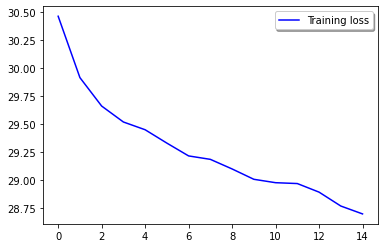

In [16]:
plt.plot(r.history['loss'], color='b', label='Training loss')
plt.legend(loc='best', shadow=True)

In [17]:
submission_values = model_lstm.predict(X_test)
submission_values = submission_values.clip(0,20)
submission = pd.DataFrame({'ID': test_id, 'item_cnt_month':submission_values.ravel()})
submission.to_csv('predict_sales_forecast_lstm.csv', index = False)

### Random Forest Regressor Model

In [9]:
X_train = dataset.values[:, :-1]
y_train = dataset.values[:, -1:]
X_test = dataset.values[:, 1:]

In [10]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 400, random_state = 0)
r = regressor.fit(X_train, y_train)

<ipython-input-10-571c39ad6e82>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r = regressor.fit(X_train, y_train)


In [11]:
submission_values = regressor.predict(X_test)
submission_values = submission_values.clip(0,20)
submission = pd.DataFrame({'ID': test_id, 'item_cnt_month':submission_values.ravel()})
submission.to_csv('predict_sales_forecast_rfr.csv', index = False)